In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import geopandas as gpd


os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

naip_data_path = os.path.join("data", "cold-springs-fire", 
                              "naip", "m_3910505_nw_13_1_20150919", 
                              "crop", "m_3910505_nw_13_1_20150919_crop.tif")

with rio.open(naip_data_path) as src:
    naip_data = src.read()
    naip_meta = src.profile
naip_meta

# View shape of the data
naip_data.shape


(4, 2312, 4377)

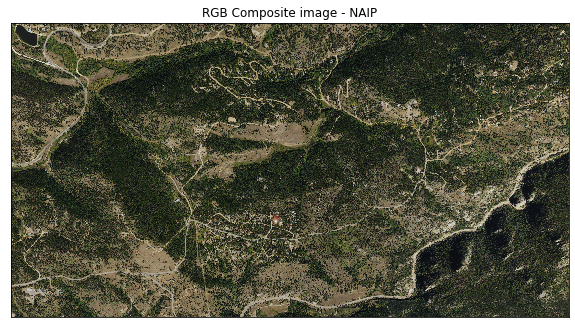

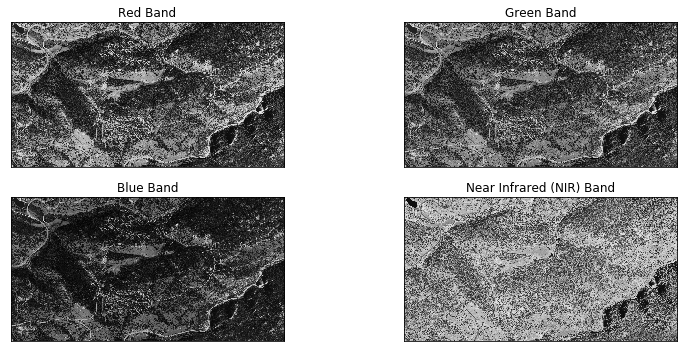

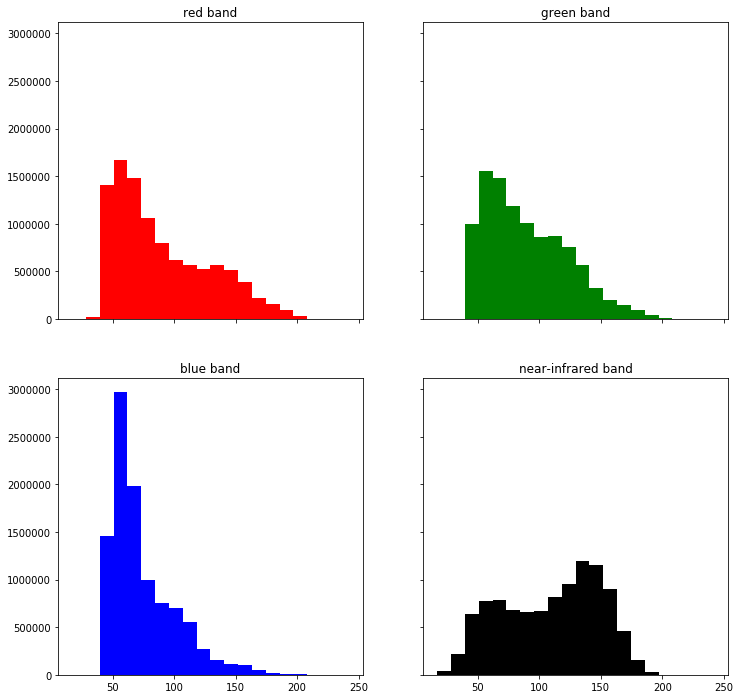

In [24]:
ep.plot_rgb(naip_data,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

# Plot all bands using the earthpy function
ep.plot_bands(naip_data, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_data, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

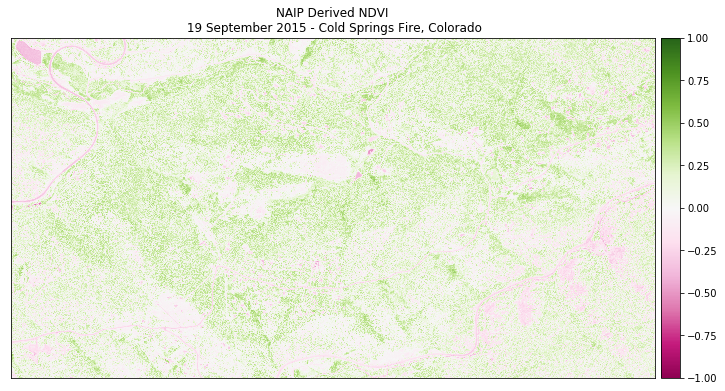

In [17]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

ep.plot_bands(naip_ndvi, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

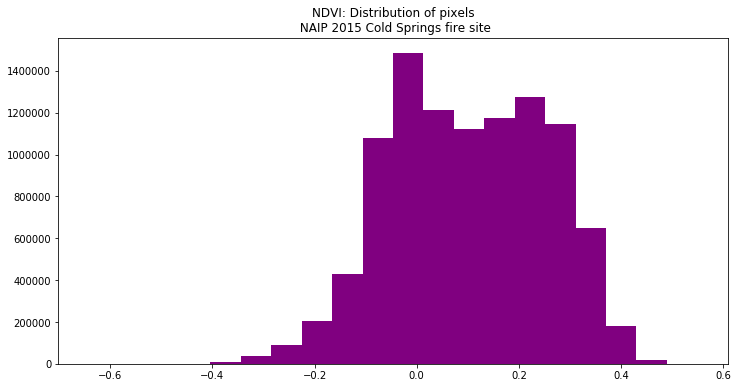

In [18]:
ep.hist(naip_ndvi,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

In [28]:
naip_meta

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 4377, 'height': 2312, 'count': 4, 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(1.0, 0.0, 457163.0,
       0.0, -1.0, 4426952.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}

In [29]:
naip_transform = naip_meta["transform"]
naip_crs = naip_meta["crs"]

In [30]:
naip_transform, naip_crs

(Affine(1.0, 0.0, 457163.0,
        0.0, -1.0, 4426952.0),
 CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'))

In [31]:
# Change the count or number of bands from 4 to 1
naip_meta['count'] = 1

# Change the data type to float rather than integer
naip_meta['dtype'] = "float64"
naip_meta

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -32768.0, 'width': 4377, 'height': 2312, 'count': 1, 'crs': CRS.from_wkt('PROJCS["UTM Zone 13, Northern Hemisphere",GEOGCS["GRS 1980(IUGG, 1980)",DATUM["unknown",SPHEROID["GRS80",6378137,298.257222101],TOWGS84[0,0,0,0,0,0,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'), 'transform': Affine(1.0, 0.0, 457163.0,
       0.0, -1.0, 4426952.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}

In [32]:
naip_ndvi_outpath = os.path.join("data", "cold-springs-fire", 
                                 "outputs", "naip_ndvi.tif")

# Write your the ndvi raster object
with rio.open(naip_ndvi_outpath, 'w', **naip_meta) as dst:
    dst.write(naip_ndvi, 1)